In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
detectors_run4 = pd.read_excel("cms_system_140.xlsx", sheet_name="Detectors")
triggers_run4 = pd.read_excel("cms_system_140.xlsx", sheet_name="Triggers")

In [3]:
detectors_run4

,Category,Detector,Data (bytes),True Pass,True Discard,False Pass (alpha),False Discard (beta),Compression,PU 140,PU 200
0,Tracking,Inner Tracker,1440000,40000000,0,0,0,0,1.010,1.440
1,Tracking,Outer Tracker PS,720000,40000000,0,0,0,0,0.500,0.720
2,Tracking,Outer Tracker 2S,430000,40000000,0,0,0,0,0.300,0.430
3,Tracking,Track Finder TPG,10000,40000000,0,0,0,0,0.010,0.010
4,Timing,MIP Timing BTL,240000,40000000,0,0,0,0,0.170,0.240
5,Timing,MIP Timing ETL,440000,40000000,0,0,0,0,0.310,0.440
6,Calorimetry,ECAL Barrel,600000,40000000,0,0,0,0,0.420,0.600
7,Calorimetry,HCAL Barrel,240000,40000000,0,0,0,0,0.240,0.240
8,Calorimetry,HCAL HO,30000,40000000,0,0,0,0,0.030,0.030
9,Calorimetry,HCAL HF,60000,40000000,0,0,0,0,0.060,0.060


In [4]:
triggers_run4

,Input,Output,Name,Data (bytes),True Pass,True Discard,False Pass (alpha),False Discard (beta),Compression,PU 140,PU 200
0,Tracking,Intermediate,Tracking,0,1,0,0,0,0,NaN,NaN
1,Timing,Intermediate,Timing,0,1,0,0,0,0,NaN,NaN
2,Calorimetry,Intermediate,Calorimetry,0,1,0,0,0,0,NaN,NaN
3,Muon,Intermediate,Muon,0,1,0,0,0,0,NaN,NaN
4,Intermediate,Global,Intermediate,260000,1,400,0,0,0,0.26,0.26
5,Global,Disk,Global,0,1,20,0,0,0,NaN,NaN


In [5]:
type(triggers_run4.iloc[4])

pandas.core.series.Series

In [6]:
def entry_to_confusion(entry: pd.core.series.Series):
    tp = entry["True Pass"]
    td = entry["True Discard"]
    fp = entry["False Pass (alpha)"]
    fd = entry["False Discard (beta)"]

    confusion = np.array([[td, fd], [fp, tp]])
    return confusion

In [22]:
def detectors(detector_data: pd.DataFrame):
    n = len(detector_data)
    nodes = []
    edges = []

    for i in range(n):
        detector = detector_data.iloc[i]
        name = detector["Detector"]
        system = detector["Category"]
        properties = {
                      "sample data": detector["Data (bytes)"],
                      "error matrix": entry_to_confusion(detector),
                      "reduction": 1.0 - detector["Compression"],
                      "complexity": lambda x: x,
                      }
        nodes.append((name, properties))
        edges.append((name, system))

    return nodes, edges

In [23]:
detectors(detectors_run4)

([('Inner Tracker',
   {'sample data': 1440000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Outer Tracker PS',
   {'sample data': 720000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Outer Tracker 2S',
   {'sample data': 430000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Track Finder TPG',
   {'sample data': 10000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('MIP Timing BTL',
   {'sample data': 240000,
    'error matrix': array([[       0,      

In [9]:
def triggers(trigger_data: pd.DataFrame):
    n = len(trigger_data)
    edges = []
    triggers = []

    for i in range(n):
        trigger = trigger_data.iloc[i]
        name = trigger["Name"]
        edge = (trigger["Input"], trigger["Output"])
        properties = {
            "error matrix": entry_to_confusion(trigger),
            "reduction": 1.0 - trigger["Compression"],
            "sample data": trigger["Data (bytes)"],
        }
        triggers.append((name, properties))
        edges.append(edge)

    return triggers, edges

In [10]:
triggers(triggers_run4)

([('Tracking',
   {'error matrix': array([[0, 0],
           [0, 1]]), 'reduction': 1.0, 'sample data': 0}),
  ('Timing',
   {'error matrix': array([[0, 0],
           [0, 1]]), 'reduction': 1.0, 'sample data': 0}),
  ('Calorimetry',
   {'error matrix': array([[0, 0],
           [0, 1]]), 'reduction': 1.0, 'sample data': 0}),
  ('Muon',
   {'error matrix': array([[0, 0],
           [0, 1]]), 'reduction': 1.0, 'sample data': 0}),
  ('Intermediate',
   {'error matrix': array([[400,   0],
           [  0,   1]]), 'reduction': 1.0, 'sample data': 260000}),
  ('Global',
   {'error matrix': array([[20,  0],
           [ 0,  1]]), 'reduction': 1.0, 'sample data': 0})],
 [('Tracking', 'Intermediate'),
  ('Timing', 'Intermediate'),
  ('Calorimetry', 'Intermediate'),
  ('Muon', 'Intermediate'),
  ('Intermediate', 'Global'),
  ('Global', 'Disk')])

In [33]:
def construct_graph(detector_data: pd.DataFrame, trigger_data: pd.DataFrame):
    g = nx.DiGraph()

    detector_nodes, detector_edges = detectors(detector_data)
    g.add_nodes_from(detector_nodes)

    trigger_nodes, trigger_edges = triggers(trigger_data)
    g.add_nodes_from(trigger_nodes)
    g.add_edges_from(detector_edges)
    g.add_edges_from(trigger_edges)
    return g

    globals = measure(g)
    for k, v in globals:
        g[k] = v

    return g, globals


In [34]:
detectors(detectors_run4)

([('Inner Tracker',
   {'sample data': 1440000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Outer Tracker PS',
   {'sample data': 720000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Outer Tracker 2S',
   {'sample data': 430000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('Track Finder TPG',
   {'sample data': 10000,
    'error matrix': array([[       0,        0],
           [       0, 40000000]]),
    'reduction': 1.0,
    'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}),
  ('MIP Timing BTL',
   {'sample data': 240000,
    'error matrix': array([[       0,      

In [35]:
cms_pu140 = construct_graph(detectors_run4, triggers_run4)

In [36]:
cms_pu140.nodes["Inner Tracker"]

{'sample data': 1440000,
 'error matrix': array([[       0,        0],
        [       0, 40000000]]),
 'reduction': 1.0,
 'complexity': <function __main__.detectors.<locals>.<lambda>(x)>}

In [37]:
cms_pu140.edges


OutEdgeView([('Inner Tracker', 'Tracking'), ('Outer Tracker PS', 'Tracking'), ('Outer Tracker 2S', 'Tracking'), ('Track Finder TPG', 'Tracking'), ('MIP Timing BTL', 'Timing'), ('MIP Timing ETL', 'Timing'), ('ECAL Barrel', 'Calorimetry'), ('HCAL Barrel', 'Calorimetry'), ('HCAL HO', 'Calorimetry'), ('HCAL HF', 'Calorimetry'), ('HGCAL', 'Calorimetry'), ('HGCAL TPG Stage1', 'Calorimetry'), ('HGCAL TPG Stage2', 'Calorimetry'), ('Muon DT', 'Muon'), ('Muon CSC', 'Muon'), ('Muon GEM GE1', 'Muon'), ('Muon GEM GE2', 'Muon'), ('Muon GEM ME0', 'Muon'), ('Muon RPC', 'Muon'), ('Tracking', 'Intermediate'), ('Timing', 'Intermediate'), ('Calorimetry', 'Intermediate'), ('Muon', 'Intermediate'), ('Intermediate', 'Global'), ('Global', 'Disk')])

In [38]:
cms_pu140["Tracking"]

AtlasView({'Intermediate': {}})

In [39]:
cms_pu140["Intermediate"]

AtlasView({'Global': {}})

In [40]:
cms_pu140["Global"]

AtlasView({'Disk': {}})

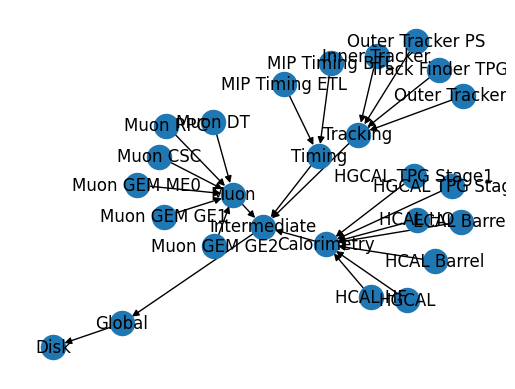

In [41]:
subax1 = plt.subplot(111)
nx.draw(cms_pu140, with_labels=True)